#  Big Data Mart Sales Case Study

## Prelude:
In this case, we are given details about product, outlet and sales from that outlet. The data of sales is collected in the year 2013. Some attributes of each product and stores are defined. The data sprawls over 1559 products in 10 different stores located in 10 different cities.

### About the Independent Variables:
 We are given three continuous variables which are as follows:
 
 1. Item_Identifier: This a character unique identifying variable which talks about item code
 2. Item_Weight: This continuous variable  that talks about weight of the item
 3. Item_Fat_Content: This is a categorical variable describing the fat in an item
 4. Item_Visibility: This is a continuous variable
 5. Item_Type: This is a categorical variable describing the type of an item
 6. Item_MRP: This continuous variable  that talks about price of the item
 7. Outlet_Identifier: This is a categorical variable for identifying a particular outlet
 8. Outlet_Establishment_Year: This is a categorical variable for determining the year of establishment for a particular outlet
 9. Outlet_Size: This is a categorical variable for determining size of a particular outlet
 10. Outlet_Location_Type: This is a categorical variable for determining location class of a particular outlet
 11. Outlet_Type: This is a categorical variable for determining structural class of a particular outlet

### About the Dependent Variable:
 
 Item_Outlet_Sales: This continuous variable talks about the sales generated by particular item in a specific outlet by the above independent variables.

## Problem Statement:
    Build a best-fit prediction model for understanding the properties of product and store for increasing sales 

In [1]:
# Importing necessary packages

# Importing fundamental packages
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
import pyforest            
import dask.dataframe as dd

## For visualization
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


## To create copy of data
import copy

## Pipeline Packages

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# For Building Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor




## Evaluation Metrics Packages
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Saving the model
import pickle


Populating the interactive namespace from numpy and matplotlib


In [2]:
def read(link):
    global data_train

    data_train=pd.read_csv(link)
    
    data_train=pd.DataFrame(data_train)
    
    
    print(data_train)

In [3]:
read(link="bigdatamart_Train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [4]:
def read(link):
    global data_test

    data_test=pd.read_csv(link)
    
    data_test=pd.DataFrame(data_test)
    
    
    print(data_test)

In [5]:
read(link="bigdatamart_Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [6]:
data_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [7]:
# combining Item_Fat_Content misspelled
data_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
data_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [8]:
# combining Item_type 
data_train['Item_Type'].replace(["Breads", "Breakfast", "Dairy","Starchy Foods", "Fruits and Vegetables", "Meat", "Seafood"],'Perishable', inplace=True)
data_train['Item_Type'].replace(["Baking Goods", "Canned","Others", "Frozen Foods", "Hard Drinks", "Health and Hygiene","Household", "Soft Drinks", "Snack Foods"],'Non Perishable', inplace=True)

data_test['Item_Type'].replace(["Breads", "Breakfast", "Dairy","Starchy Foods", "Fruits and Vegetables", "Meat", "Seafood"],'Perishable', inplace=True)
data_test['Item_Type'].replace(["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks","Others", "Health and Hygiene","Household", "Soft Drinks", "Snack Foods"],'Non Perishable', inplace=True)

In [9]:
# Understanding the data variables
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. There are 12 columns and 8523 rows

2. There are about 1463 missing values in Item_Weight and 2410 missing values in Outlet_ size

In [10]:
# Imputing missing values for Outlet Size
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0], inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0], inplace=True)

In [11]:
# For better analysis let us now encode the categorical variables
# 1. Item Fat content 
enc = OrdinalEncoder()
data_train[["Item_Fat_Content"]] = enc.fit_transform(data_train[["Item_Fat_Content"]])
data_test[["Item_Fat_Content"]] = enc.fit_transform(data_test[["Item_Fat_Content"]])
# Low Fat: 0  , Regular Fat: 1 

# 2. Outlet Size

data_train[["Outlet_Size"]] = enc.fit_transform(data_train[["Outlet_Size"]])
data_test[["Outlet_Size"]] = enc.fit_transform(data_test[["Outlet_Size"]])
# High: 0  , Medium: 1  , Small: 2  

# 3. Outlet Establishment Year

enc2= LabelEncoder()
data_train[["Outlet_Establishment_Year"]]=data_train[['Outlet_Establishment_Year']].apply(enc2.fit_transform)
data_test[["Outlet_Establishment_Year"]]=data_test[['Outlet_Establishment_Year']].apply(enc2.fit_transform)

# 1985 : 0, 1987 : 1, 2004 : 2, 1998 : 3, 1997 : 4, 2002 : 5, 1999 : 6, 2007 : 7, 2009 : 8

# 4. Item Type 
enc = OrdinalEncoder()
data_train[["Item_Type"]] = enc.fit_transform(data_train[["Item_Type"]])
data_test[["Item_Type"]] = enc.fit_transform(data_test[["Item_Type"]])
# Non Perishable: 0  , Perishable: 1

# 5. Outlet Location Type 
enc = OrdinalEncoder()
data_train[["Outlet_Location_Type"]] = enc.fit_transform(data_train[["Outlet_Location_Type"]])
data_test[["Outlet_Location_Type"]] = enc.fit_transform(data_test[["Outlet_Location_Type"]])
# Tier 1: 0  , Tier 2: 1  ,Tier 3: 2  

# 6. Outlet Type Type 
enc = OrdinalEncoder()
data_train[["Outlet_Type"]] = enc.fit_transform(data_train[["Outlet_Type"]])
data_test[["Outlet_Type"]] = enc.fit_transform(data_test[["Outlet_Type"]])
# Grocery Store: 0  , Supermarket Type 1: 1, Supermarket Type 2: 2, Supermarket Type 3: 3

Imputing Missing value

##### To understand the strategy we need for imputing missing values for numeric variable "Item_Weight" without hampering the character of data.

Since K-NN scores the most we must use K-NN to impute missing values

In [12]:
impute_1= SimpleImputer(strategy= "mean")
impute_2= IterativeImputer(max_iter=10, random_state= 0)
impute_3= KNNImputer(n_neighbors=9)
model= LinearRegression()

In [13]:
pipe1 = Pipeline([
    ('impute',impute_1),
    ('model',model),
])    
pipe2 = Pipeline([
    ('impute',impute_2),
    ('model',model),
])
pipe3 = Pipeline([
    ('impute',impute_3),
    ('model',model),  
    
])

In [14]:
# Create Function pre_process to check the score for strategy
def pre_process(data, target, pipe):
    
    data_reset_index = data.reset_index(drop=True)
    

# Segregate Feature & Target Variables
    X = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]

# Split train & Test

    X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=1)

# Pipe.fit, pipe.predict and accuracy
    
    pipe.fit(X_train,y_train)
    
    y_pred = pipe.predict(X_test)
    
    score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    
    return score

In [15]:
pre_process(data= data_train.drop(["Item_Identifier","Outlet_Identifier"],axis=1),
           target='Item_Outlet_Sales',
           pipe= pipe1)

1193.2506221189592

In [16]:
pre_process(data= data_train.drop(["Item_Identifier","Outlet_Identifier"],axis=1),
           target='Item_Outlet_Sales',
           pipe= pipe2)

1193.2522989264473

In [17]:
pre_process(data= data_train.drop(["Item_Identifier","Outlet_Identifier"],axis=1),
           target='Item_Outlet_Sales',
           pipe= pipe3)

1193.264689423004

In [18]:
# Splitting into 2 datasets : 1. Continuous 2. Categorical with Label variable
data_train_pre= data_train.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"],axis=1) 
data_train_or= data_train.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
                                  'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)

# Fitting and transforming the KNN Imputer model
num_data_train=impute_3.fit_transform(data_train_pre)
data_train_nomiss1= pd.DataFrame(num_data_train)

# Restoring the column Titles
data_train_nomiss1.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Recompiling with the other coulmns
data_train_2=pd.DataFrame()
data_train_2=pd.concat([data_train_nomiss1 , data_train_or], axis=1)
print(data_train_2.info())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   float64
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   float64
 8   Outlet_Type                8523 non-null   float64
 9   Item_Identifier            8523 non-null   object 
 10  Outlet_Identifier          8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(10), object(2)
memory usage: 799.2+ KB
None


In [19]:
# Splitting into 2 datasets : 1. Continuous 2. Categorical with Label variable
data_test_pre= data_test.drop(["Item_Identifier","Outlet_Identifier"],axis=1) 
data_test_or= data_test.drop(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
                                  'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],axis=1)

# Fitting and transforming the KNN Imputer model
num_data_test=impute_3.fit_transform(data_test_pre)
data_test_nomiss1= pd.DataFrame(num_data_test)

# Restoring the column Titles
data_test_nomiss1.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type', 'Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Recompiling with the other coulmns
data_test_2=pd.DataFrame()
data_test_2=pd.concat([data_test_nomiss1 , data_test_or], axis=1)
print(data_test_2.info())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   float64
 6   Outlet_Size                5681 non-null   float64
 7   Outlet_Location_Type       5681 non-null   float64
 8   Outlet_Type                5681 non-null   float64
 9   Item_Identifier            5681 non-null   object 
 10  Outlet_Identifier          5681 non-null   object 
dtypes: float64(9), object(2)
memory usage: 488.3+ KB
None


### Hypothesis

 h0: Item_Identifier is significant to sales from outlet
 
 ha: Item_Identifier is not significant to sales from outlet

In [20]:
crosstab = pd.crosstab(data_train_2["Item_Identifier"], data_train_2["Item_Outlet_Sales"])
# defining the table
stat, p, dof, expected = chi2_contingency(crosstab)

# interpret p-value
alpha = 0.05
print("p value is " , str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

<IPython.core.display.Javascript object>

p value is  0.0
Dependent (reject H0)


Item Identifier is not significant and can be dropped as p value < 0.05

h0: Outlet_Identifier is significant to sales from outlet

ha: Outlet_Identifier is not significant to sales from outlet        

In [21]:
crosstab = pd.crosstab(data_train_2["Outlet_Identifier"], data_train_2["Item_Outlet_Sales"])
# defining the table
stat, p, dof, expected = chi2_contingency(crosstab)

# interpret p-value
alpha = 0.05
print("p value is " , str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

<IPython.core.display.Javascript object>

p value is  3.7619710870475346e-27
Dependent (reject H0)


Outlet Identifier is not a significant variable so we can drop the variable

In [22]:
# Dropping the insignificant Variables from the training dataset
data_train_2= data_train_2.drop(["Item_Identifier","Outlet_Identifier"], axis=1)
data_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   float64
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   float64
 8   Outlet_Type                8523 non-null   float64
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(10)
memory usage: 666.0 KB


In [23]:
# To maintain consistency in test data we are dropping the same variables from the test dataset
data_test_2= data_test_2.drop(["Item_Identifier","Outlet_Identifier"], axis=1)
data_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   float64
 6   Outlet_Size                5681 non-null   float64
 7   Outlet_Location_Type       5681 non-null   float64
 8   Outlet_Type                5681 non-null   float64
dtypes: float64(9)
memory usage: 399.6 KB


Data Visualization and EDA - Train Data

In [24]:
print(data_train_2.describe())                          # to get descriptive statistics

       Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.871896          0.352693         0.066132     0.341664   
std       4.276926          0.477836         0.051598     0.474295   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.300000          0.000000         0.026989     0.000000   
50%      12.812222          0.000000         0.053931     0.000000   
75%      16.100000          1.000000         0.094585     1.000000   
max      21.350000          1.000000         0.328391     1.000000   

          Item_MRP  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000                8523.000000  8523.000000   
mean    140.992782                   3.790684     1.170832   
std      62.275067                   2.730322     0.600327   
min      31.290000                   0.000000     0.000000   
25%      93.826500                   1.000000     1.000000 

In [25]:
print("Skewness for the data","\n",data_train_2.skew())       # to get skewness of the data, skewness=0 for normal distribution

Skewness for the data 
 Item_Weight                  0.078163
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.667826
Item_MRP                     0.127202
Outlet_Establishment_Year    0.034270
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64


In [26]:
print("Kurosis for the data","\n",data_train_2.kurtosis() )            # to get kutosis, kurtosis <=3 for normal distribution

Kurosis for the data 
 Item_Weight                 -0.951747
Item_Fat_Content            -1.620056
Item_Visibility              1.679445
Item_Type                   -1.554373
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.348449
Outlet_Size                 -0.393087
Outlet_Location_Type        -1.456902
Outlet_Type                  0.626360
Item_Outlet_Sales            1.615877
dtype: float64


In [27]:
data_train_2.groupby(["Item_Outlet_Sales"]).describe().transpose() ### Five point summary grouped by "Outlet Sales"

Item_Outlet_Sales  33.2900     33.9558     34.6216     35.2874     36.6190     \
Item_Weight count    2.000000    1.000000    1.000000       1.000    2.000000   
            mean     9.302500   13.538889   12.438333       7.155   14.056944   
            std      0.279307         NaN         NaN         NaN    1.828657   
            min      9.105000   13.538889   12.438333       7.155   12.763889   
            25%      9.203750   13.538889   12.438333       7.155   13.410417   
...                       ...         ...         ...         ...         ...   
Outlet_Type min      0.000000    0.000000    0.000000       0.000    0.000000   
            25%      0.000000    0.000000    0.000000       0.000    0.000000   
            50%      0.000000    0.000000    0.000000       0.000    0.000000   
            75%      0.000000    0.000000    0.000000       0.000    0.000000   
            max      0.000000    0.000000    0.000000       0.000    0.000000   

Item_Outlet_Sales  37.2848     37.9506     38.6164     39.9480     40.6138     \
Item_Weight count    1.000000    5.000000    2.000000    2.000000    2.000000   
            mean    11.388889   11.795000   12.393333   14.653611   12.413333   
            std           NaN    1.218890    0.177562    3.671848    0.503617   
            min     11.388889    9.907222   12.267778   12.057222   12.057222   
            25%     11.388889   11.325000   12.330556   13.355417   12.235278   
...                       ...         ...         ...         ...         ...   
Outlet_Type min      0.000000    0.000000    0.000000    0.000000    0.000000   
            25%      0.000000    0.000000    0.000000    0.000000    0.000000   
            50%      0.000000    0.000000    0.000000    0.000000    0.000000   
            75%      0.000000    0.000000    0.000000    0.000000    0.000000   
            max      0.000000    0.000000    0.000000    0.000000    0.000000   

Item_Outlet_Sales  ...  9678.0688   9779.9362   10072.8882  10236.6750  \
Item_Weight count  ...    1.000000       1.000    1.000000        1.00   
            mean   ...   12.317222       6.825   13.755556       11.49   
            std    ...         NaN         NaN         NaN         NaN   
            min    ...   12.317222       6.825   13.755556       11.49   
            25%    ...   12.317222       6.825   13.755556       11.49   
...                ...         ...         ...         ...         ...   
Outlet_Type min    ...    3.000000       1.000    3.000000        3.00   
            25%    ...    3.000000       1.000    3.000000        3.00   
            50%    ...    3.000000       1.000    3.000000        3.00   
            75%    ...    3.000000       1.000    3.000000        3.00   
            max    ...    3.000000       1.000    3.000000        3.00   

Item_Outlet_Sales  10256.6490  10306.5840  10993.6896  11445.1020  12117.5600  \
Item_Weight count        1.00    1.000000    1.000000    1.000000        1.00   
            mean        14.85   12.077222   15.382778   13.326111       11.14   
            std           NaN         NaN         NaN         NaN         NaN   
            min         14.85   12.077222   15.382778   13.326111       11.14   
            25%         14.85   12.077222   15.382778   13.326111       11.14   
...                       ...         ...         ...         ...         ...   
Outlet_Type min          1.00    3.000000    3.000000    3.000000        3.00   
            25%          1.00    3.000000    3.000000    3.000000        3.00   
            50%          1.00    3.000000    3.000000    3.000000        3.00   
            75%          1.00    3.000000    3.000000    3.000000        3.00   
            max          1.00    3.000000    3.000000    3.000000        3.00   

Item_Outlet_Sales  13086.9648  
Item_Weight count    1.000000  
            mean    15.749444  
            std           NaN  
            min     15.749444  
            25%     15.749444  


In [28]:
def outlier(mydata):                        # Outlier Plotting
    for i in mydata.columns:
        fig = px.box(mydata, y= i, width=600, height=400, title=i, template="plotly_dark")
        fig.show()

In [29]:
outlier(mydata=data_train_2)

In [30]:
def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

In [31]:
calc_vif(data=data_train_2.drop(["Item_Outlet_Sales"],axis=1))

<IPython.core.display.Javascript object>

variables       VIF
0                Item_Weight  7.385025
1           Item_Fat_Content  1.586570
2            Item_Visibility  2.652803
3                  Item_Type  1.574803
4                   Item_MRP  5.309084
5  Outlet_Establishment_Year  2.919203
6                Outlet_Size  5.665052
7       Outlet_Location_Type  4.963450
8                Outlet_Type  4.358657

In [32]:
# Treating outliers
q1 = data_train_2.quantile(.25)    # first quartile
q3 = data_train_2.quantile(.75)    # third quartile
iqr = q3 - q1

for i in data_train_2.drop(['Item_Outlet_Sales'],axis=1).columns:
    data_train_2[i] = np.where(data_train_2[i] > (data_train_2[i].quantile(0.75) + (data_train_2[i].quantile(0.75) - data_train_2[i].quantile(0.25))*1.5),
                           (data_train_2[i].quantile(0.75) + (data_train_2[i].quantile(0.75) - data_train_2[i].quantile(0.25))*1.5),
                          np.where(data_train_2[i] < (data_train_2[i].quantile(0.25) - (data_train_2[i].quantile(0.75) - data_train_2[i].quantile(0.25))*1.5),
                           (data_train_2[i].quantile(0.25) - (data_train_2[i].quantile(0.75) - data_train_2[i].quantile(0.25))*1.5),data_train_2[i]))
    



In [33]:
# Treating outliers
q1 = data_test_2.quantile(.25)    # first quartile
q3 = data_test_2.quantile(.75)    # third quartile
iqr = q3 - q1

for i in data_test_2.columns:
    data_test_2[i] = np.where(data_test_2[i] > (data_test_2[i].quantile(0.75) + (data_test_2[i].quantile(0.75) - data_test_2[i].quantile(0.25))*1.5),
                           (data_test_2[i].quantile(0.75) + (data_test_2[i].quantile(0.75) - data_test_2[i].quantile(0.25))*1.5),
                          np.where(data_test_2[i] < (data_test_2[i].quantile(0.25) - (data_test_2[i].quantile(0.75) - data_test_2[i].quantile(0.25))*1.5),
                           (data_test_2[i].quantile(0.25) - (data_test_2[i].quantile(0.75) - data_test_2[i].quantile(0.25))*1.5),data_test_2[i]))
    



In [34]:
## Histogram for all the variables using plotly_express by 'Sales'

for i in data_train_2.columns:
    fig = px.histogram(data_train_2, x= i, histfunc = "count",  width=1000, height=800, 
                       title = "Histogram for " + i, 
                       template="plotly_dark", cumulative=True)

    fig.show() 

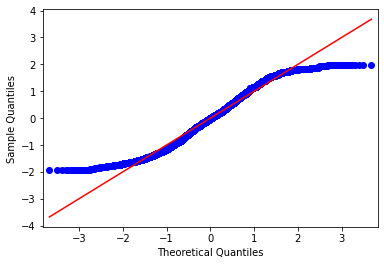

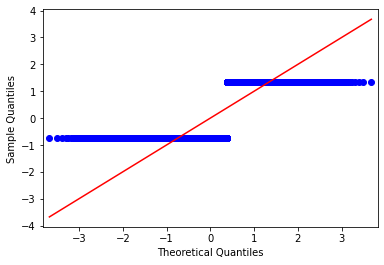

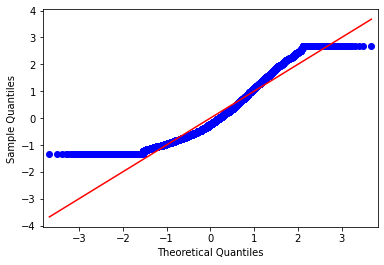

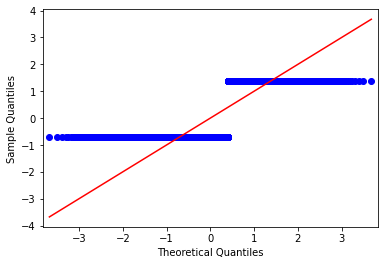

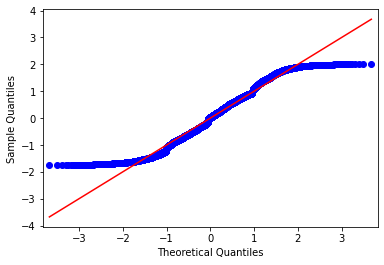

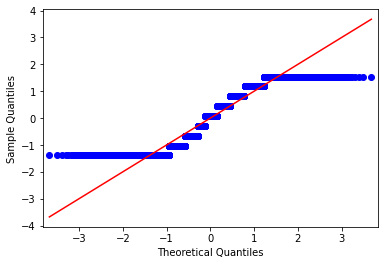

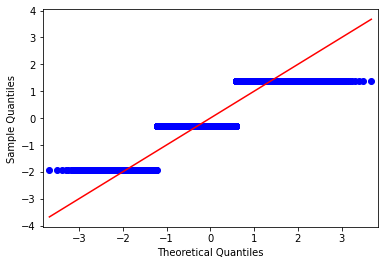

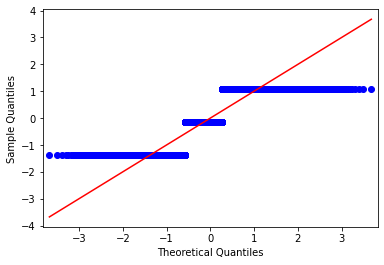

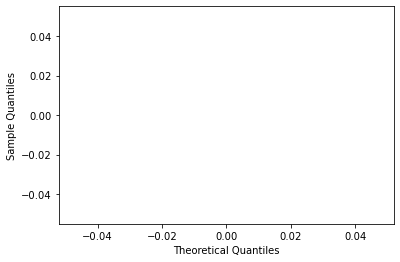

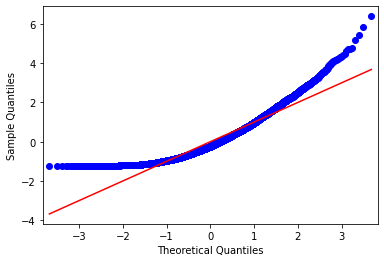

In [35]:
# Plotting qq plot

for i in data_train_2.columns:
    fig = sm.qqplot(data_train_2[i], line="s", fit=True )

    fig.show()
    

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

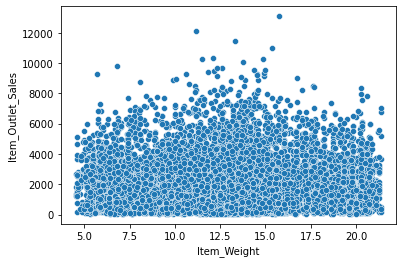

In [36]:
# Scatterplot for Item Weigh and Outlet Sales

sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=data_train_2)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

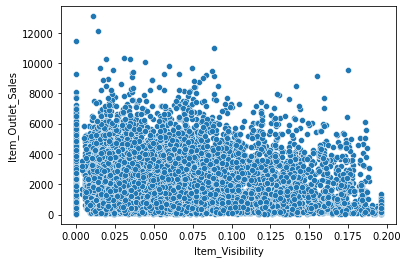

In [37]:
# Scatterplot for Item Visibiity and Outlet Sales

sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=data_train_2)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

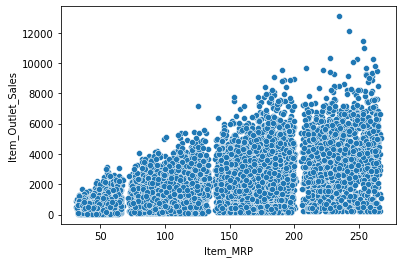

In [38]:
# Scatterplot for Item MRP and Outlet Sales

sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=data_train_2)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

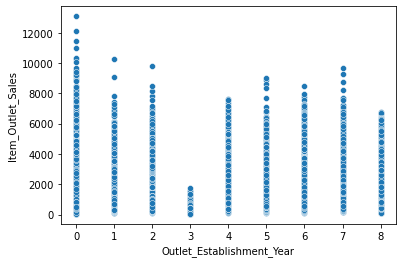

In [39]:
# Scatterplot for Outlet Establishment Year and Outlet Sales

sns.scatterplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=data_train_2)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

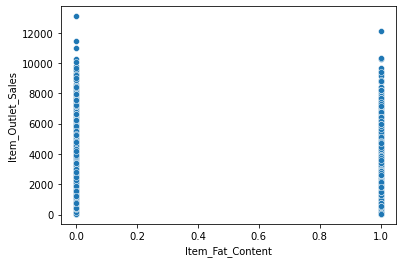

In [40]:
# Scatterplot for Item Fat Content and Outlet Sales

sns.scatterplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=data_train_2)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

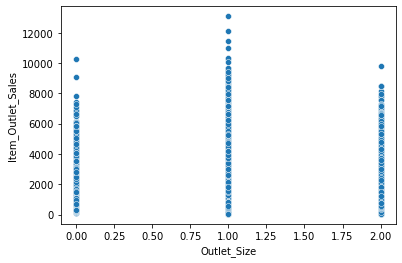

In [41]:
# Scatterplot for Size of the Outlet and Outlet Sales

sns.scatterplot(x="Outlet_Size",y="Item_Outlet_Sales",data=data_train_2)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

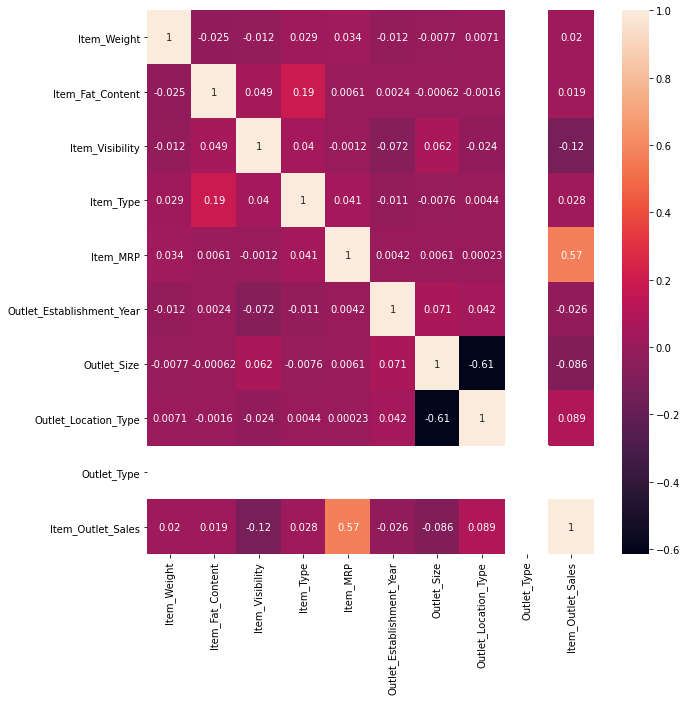

In [42]:
plt.figure(figsize=(10,10))                      # plotting heat map to check correlation
sns.heatmap(data_train_2.corr(method = "pearson"), annot = True)

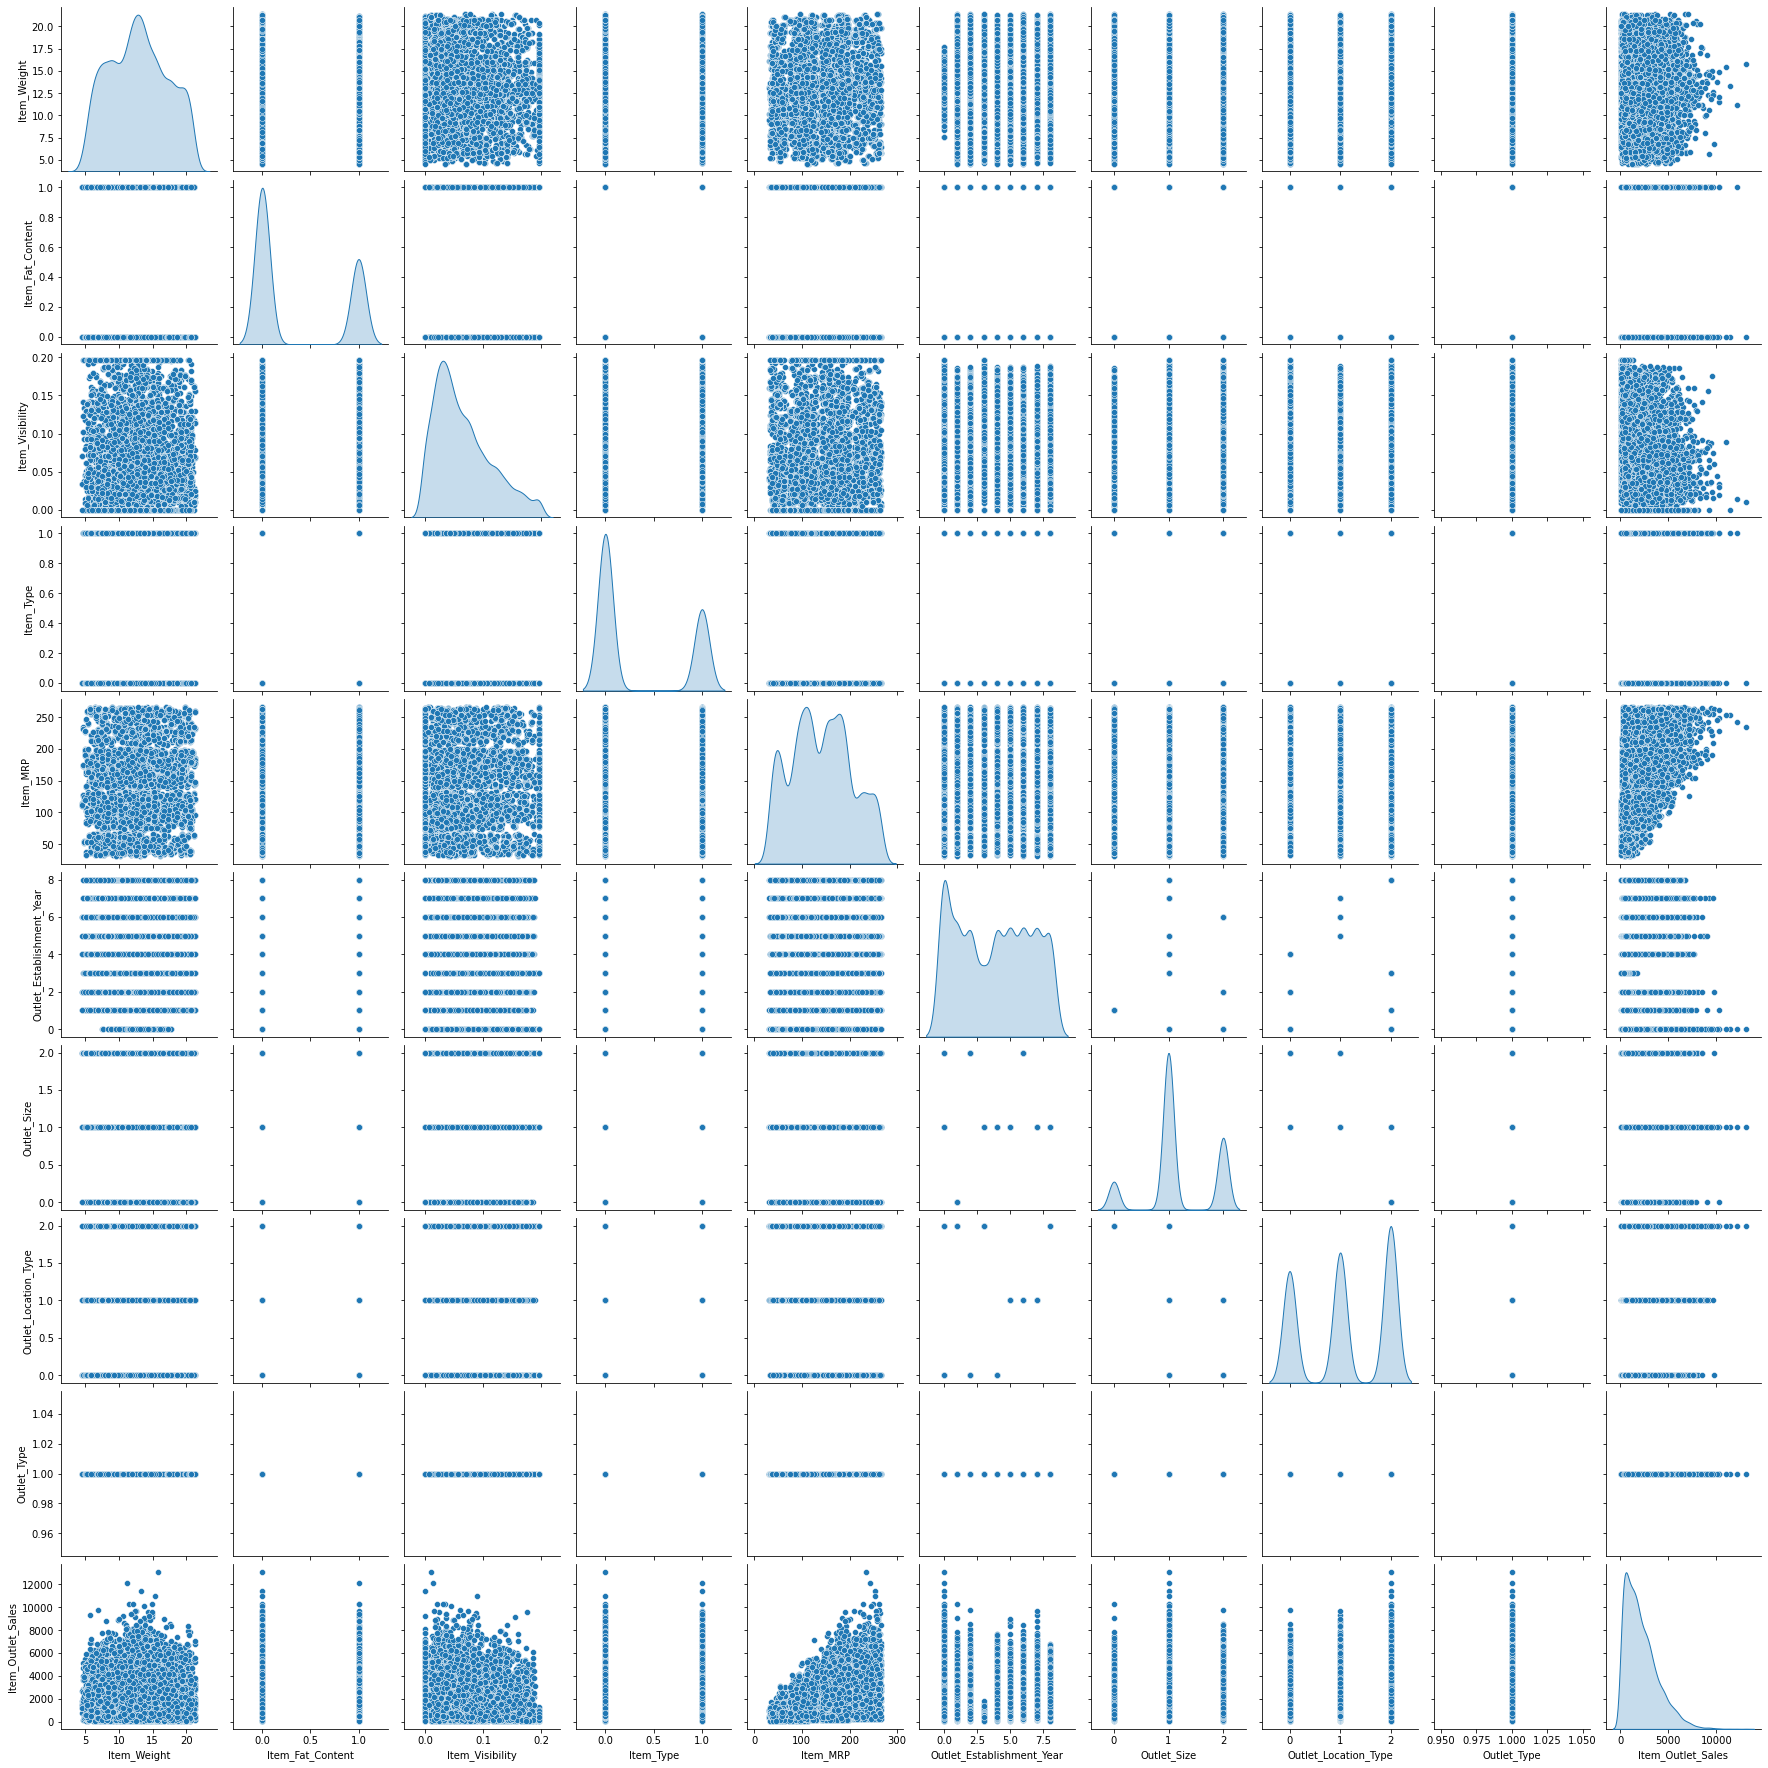

In [43]:
sns.pairplot(data_train_2, kind='scatter', diag_kind='kde')

In [44]:
data_features= data_train_2.drop(["Item_Outlet_Sales"],axis=1)
data_label=pd.DataFrame(data_train_2["Item_Outlet_Sales"])

<IPython.core.display.Javascript object>

In [45]:
# Removing skewness using Yeo-Johnson
# Removing data skewness
pt = PowerTransformer(method='yeo-johnson',standardize='True')
    
data_noskew= pt.fit_transform(data_features.values)
data_noskewtab= pd.DataFrame(data_noskew)
data_noskewtab.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

print(data_noskewtab.info())

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   float64
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   float64
 8   Outlet_Type                8523 non-null   float64
dtypes: float64(9)
memory usage: 599.4 KB
None


In [46]:
# Removing skewness using Yeo-Johnson
# Removing data skewness
pt = PowerTransformer(method='yeo-johnson',standardize='True')
    
data_noskew= pt.fit_transform(data_test_2.values)
data_final_test= pd.DataFrame(data_noskew)
data_final_test.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

print(data_final_test.info())

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   float64
 6   Outlet_Size                5681 non-null   float64
 7   Outlet_Location_Type       5681 non-null   float64
 8   Outlet_Type                5681 non-null   float64
dtypes: float64(9)
memory usage: 399.6 KB
None


In [47]:
data_final=pd.DataFrame()
data_final=pd.concat([data_noskewtab,data_label], axis=1)
print(data_final.info())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   float64
 6   Outlet_Size                8523 non-null   float64
 7   Outlet_Location_Type       8523 non-null   float64
 8   Outlet_Type                8523 non-null   float64
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(10)
memory usage: 666.0 KB
None


In [48]:
data_features2= data_final.drop(['Item_Outlet_Sales'], axis=1)

array([[-0.81448556, -0.73814723, -1.14683906,  1.38811181,  1.62367023,
         0.19488885, -0.29329517, -1.37384276,  0.        ],
       [-1.71842504,  1.35474328, -1.03889389, -0.72040306, -1.59501643,
         1.39274563, -0.29329517,  1.08832445,  0.        ],
       [ 1.07091706, -0.73814723, -1.1227561 ,  1.38811181,  0.08123678,
         0.19488885, -0.29329517, -1.37384276,  0.        ],
       [ 1.42681013,  1.35474328, -1.73206758,  1.38811181,  0.68996809,
        -0.15781235, -0.29329517,  1.08832445,  0.        ],
       [-0.90854106, -0.73814723, -1.73206758, -0.72040306, -1.47607759,
        -0.98991584, -1.92592546,  1.08832445,  0.        ]])

[ -1  -1 410 ...   8  -1  14]


463

1

Estimated number of clusters: 462
Estimated number of noise points: 2035


Text(0.5, 1.0, 'Estimated number of clusters: 462')

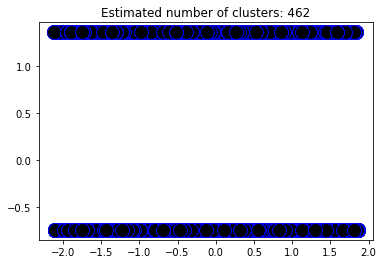

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

[[ 0.82460197 -0.73814723  0.26636705  1.38811181  0.89556039 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.82460197 -0.73814723 -0.62779101  1.38811181  0.43972693 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.91081587 -0.73814723  0.09902259  1.38811181  0.51000835 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.74867545 -0.73814723  0.10594826  1.38811181  1.27596954 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.93227808 -0.73814723 -0.2978755   1.38811181  0.74389783 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.80295587 -0.73814723 -0.83288279  1.38811181  0.48534501 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 0.74867545 -0.73814723  0.01788389  1.38811181  1.29229725 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 1.22908584 -0.73814723  0.09220326  1.38811181  0.40783119 -0.98991584
  -1.92592546  1.08832445  0.        ]
 [ 1.09211566 -0.73814723  0.04214209  1.38811181  0.28208653 -0.98991584
  -1.92592546  1.08832

In [49]:
# DB Scan For the train data

# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]
data_features, labels_true = make_blobs(n_samples=50, centers=centers, cluster_std=0.4,
                            random_state=1)  # generate sample blobs
X = StandardScaler().fit_transform(data_features2)
X[:5]

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(X)

labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

print (labels)

# Setting Length of labels
len(set(labels))

1 if -1 in labels else 0

# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of noises (-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Below code is for showcasing in diagram. Nothing related to model building

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Finding counts in each cluster
np.unique(labels, return_counts=True)

# Selecting only noises
noises = X[labels == 4]

print (noises)




In [50]:
data_final_pre= pd.concat([data_final,data_final_test], axis=0)

<IPython.core.display.Javascript object>

In [51]:
data_final_pre['Item_Outlet_Sales'].fillna(data_final_pre['Item_Outlet_Sales'].mean(), inplace=True)

### Splitting into train and test

In [52]:
# Splitting data into train and test

def split (data,target):
    data_reset_index = data.reset_index(drop=True)
# Data split
    global x
    global y
    global x_train
    global y_train
    global x_test
    global y_test
# Segregate Feature & Target Variables
    x = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)
    
    print(x_train.info())
    ("\n")
    print(x_test.info())
    ("\n")
    print(y_train.shape)
    ("\n")
    print(y_test.shape)
    ("\n")

In [53]:
split(data=data_final_pre,
      target="Item_Outlet_Sales")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9942 entries, 8013 to 5994
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                9942 non-null   float64
 1   Item_Fat_Content           9942 non-null   float64
 2   Item_Visibility            9942 non-null   float64
 3   Item_Type                  9942 non-null   float64
 4   Item_MRP                   9942 non-null   float64
 5   Outlet_Establishment_Year  9942 non-null   float64
 6   Outlet_Size                9942 non-null   float64
 7   Outlet_Location_Type       9942 non-null   float64
 8   Outlet_Type                9942 non-null   float64
dtypes: float64(9)
memory usage: 776.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4262 entries, 6109 to 9913
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   It

## Scaling the data

In [54]:
scale_1= StandardScaler()
scale_2= MinMaxScaler()
scale_3= RobustScaler()
model= LinearRegression()

In [55]:
pipe1 = Pipeline([
    ('Scale',scale_1),
    ('model',model),
])    
pipe2 = Pipeline([
    ('Scale',scale_2),
    ('model',model),
])
pipe3 = Pipeline([
    ('Scale',scale_3),
    ('model',model),  
    
])

In [56]:
# Create Function Name 
def pre_process(data, pipe):

# Pipe.fit, pipe.predict and accuracy
    
    pipe.fit(x_train,y_train)
    
    y_pred = pipe.predict(x_test)
    
    score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    
    return score

In [57]:
pre_process(data= data_features2,
           pipe= pipe1)

1196.4093085997204

In [58]:
pre_process(data= data_features2,
           pipe= pipe2)

1196.4093085997204

In [59]:
pre_process(data= data_features2,
           pipe= pipe3)

1196.4093085997204

In [60]:
scalar= StandardScaler()
scalar.fit(x_train)
x_trainsc =  scalar.transform(x_train)
x_testsc  =  scalar.transform(x_test)


StandardScaler()

### PCA

In [61]:
pca = PCA(n_components = 0.5)
pca.fit(x_trainsc)
x_train_model = pca.transform(x_trainsc)
x_test_model = pca.transform(x_testsc)
ex_variance=np.var(x_train_model,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

print("shape of x_train_pca", x_train_model.shape)
print('')    
print("Explained Variance Ratio for Training Dataset: \n", ex_variance_ratio)

print(" ")

ex_variance_1 = np.var(x_test_model , axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
    
print("Explained Variance Ratio for Test Dataset: \n", ex_variance_ratio_1) 
print(" ")

<IPython.core.display.Javascript object>

PCA(n_components=0.5)

shape of x_train_pca (9942, 4)

Explained Variance Ratio for Training Dataset: 
 [0.32868405 0.24244019 0.21552515 0.21335062]
 
Explained Variance Ratio for Test Dataset: 
 [0.33000587 0.24687256 0.20751705 0.21560452]
 


## Model Building

Linear Regression

In [62]:
lr = LinearRegression()
lr.fit(x_trainsc, y_train)


model = sm.OLS(y_train, x_trainsc).fit()


y_pred = model.predict(x_testsc)

print("Linear Regression Train Score: ", lr.score(x_trainsc , y_train))

print("Linear Regression Test Score: ", lr.score(x_testsc , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.summary())

LinearRegression()

Linear Regression Train Score:  0.2106463707561942
Linear Regression Test Score:  0.19090104802644137
Mean Absolute Error: 2190.32
Mean Squared Error: 6179947.65
Root Mean Squared Error: 2485.95
                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              74.39
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                   1.15e-119
Time:                        10:54:17   Log-Likelihood:                         -91781.
No. Observations:                9942   AIC:                                  1.836e+05
Df Residuals:                    9934   BIC:                                  1.836e+05
Df Model:                           8                                                  
Covariance Ty

In [63]:
rfe = RFE(lr, n_features_to_select=6)             
rfe = rfe.fit(x_trainsc, y_train)

r2 = sklearn.metrics.r2_score(y_test, y_pred)

scores = cross_val_score(lr, x_trainsc, y_train, scoring='r2', cv=5)
scores   

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr, x_trainsc, y_train, scoring='r2', cv=folds)
scores  

scores = cross_val_score(lr, x_trainsc, y_train, scoring='neg_mean_squared_error', cv=5)
scores

<IPython.core.display.Javascript object>

array([0.22109482, 0.20179154, 0.20763132, 0.1949539 , 0.21632981])

array([0.19213309, 0.21075431, 0.20348531, 0.22933189, 0.20261343])

array([-1445189.82243374, -1358454.07439138, -1341920.44588801,
       -1288983.32899595, -1435994.72590536])

In [64]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_trainsc, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
grid_result= model_cv.fit(x_trainsc, y_train)   
print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

LinearRegression()

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Best Score:  0.20802775709528915
Best Params:  {'n_features_to_select': 6}


In [65]:
# final model
n_features_optimal = 6
lm = LinearRegression()
lm.fit(x_trainsc, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_trainsc, y_train)

# predict prices of X_test
y_pred = lm.predict(x_testsc)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

print("Linear Regression Train Score: ", lm.score(x_trainsc , y_train))

print("Linear Regression Test Score: ", lm.score(x_testsc , y_test))

print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

LinearRegression()

<IPython.core.display.Javascript object>

0.19090104802644137
Linear Regression Train Score:  0.2106463707561942
Linear Regression Test Score:  0.19090104802644137
Mean Absolute Error: 862.83
Mean Squared Error: 1431395.23
Root Mean Squared Error: 1196.41


In [66]:
lasso_001 = Lasso(alpha = 0.5 , max_iter=10e5)

lasso_001.fit(x_trainsc , y_train)


y_pred_lasso = lasso_001.predict(x_testsc)

print("LASSO Regression Train Score: ", lasso_001.score(x_trainsc , y_train))

print("LASSO Regression Test Score: ", lasso_001.score(x_testsc , y_test))


print('Mean Absolute Error:', np.round(metrics.mean_absolute_error(y_test, y_pred_lasso),2))  
print('Mean Squared Error:', np.round(metrics.mean_squared_error(y_test, y_pred_lasso),2))  
print('Root Mean Squared Error:', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),2))


coeff_used_002 = np.sum(lasso_001.coef_ != 0)

print("Coefficient used:","\n",coeff_used_002)

Lasso(alpha=0.5, max_iter=1000000.0)

LASSO Regression Train Score:  0.2106453278363556
LASSO Regression Test Score:  0.19092307239702655
Mean Absolute Error: 862.71
Mean Squared Error: 1431356.27
Root Mean Squared Error: 1196.39
Coefficient used: 
 8


In [67]:
svm = SVR(kernel = 'rbf')
svm.fit(x_trainsc, y_train)



y_pred_svm = svm.predict(x_testsc)


print("Support Vector Model Train Score: ", svm.score(x_trainsc , y_train))

print("Support Vector Model Test Score: ", svm.score(x_testsc , y_test))


print('Mean Absolute Error: \n', np.round(metrics.mean_absolute_error(y_test, y_pred_svm),2)) 

print(" ")

print('Mean Squared Error: \n', np.round(metrics.mean_squared_error(y_test, y_pred_svm),2))

print(" ")

print('Root Mean Squared Error: \n', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),2))

SVR()

Support Vector Model Train Score:  0.01090468743464379
Support Vector Model Test Score:  0.010048839260300757
Mean Absolute Error: 
 804.78
 
Mean Squared Error: 
 1751344.96
 
Root Mean Squared Error: 
 1323.38
